In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

# Attributes

age - age in years (continuous) <br><br>
sex - (1 = male) or (0 = female) (categorical)<br><br>
cp - chest paint type (categorial)<br><br>
trestbsp - resting blood pressure  (continuous) <br><br>
chol - serum cholestoral in mg/dl (continuous) <br><br>
fbs - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) (categorical) <br><br>
restecg - resting electrocardiographic results (categorical)
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophyby Estes' criteria 

thalach - maximum heart rate achieved (continuous) <br><br>
exang - exercise induced angina (1 = yes; 0 = no) (categorical) <br><br>
oldpeak - ST depression induced by exercise relative to rest (continuous) <br><br>
slope - slope of the peak exercise ST segment (categorical)
* upsloping
* Value 2: flat
* Value 3: downsloping

ca - number of major vessels (0-3) colored by flourosopy (categorical)<br><br>
thal - (categorical)
* 3 = normal
* 6 = fixed defect
* 7 = reversable defect

num - predicted attribute

In [13]:
data = pd.read_csv('cleveland.csv').drop(['exang','oldpeak','slope','ca','thal', 'restecg'], axis=1)

X = data.drop(["target"], axis=1)
y = data["target"] != 0

# Dataset Exploration

In [14]:
X.describe()

,Age,Sex,Chest-pain-type,trestbps(resting blood pressure),chol,fbs,thalach
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,149.607261
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,22.875003
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,133.500000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,153.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,166.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,202.000000


In [15]:
y.value_counts().values

array([164, 139])

Text(0.5, 1.0, 'Target')

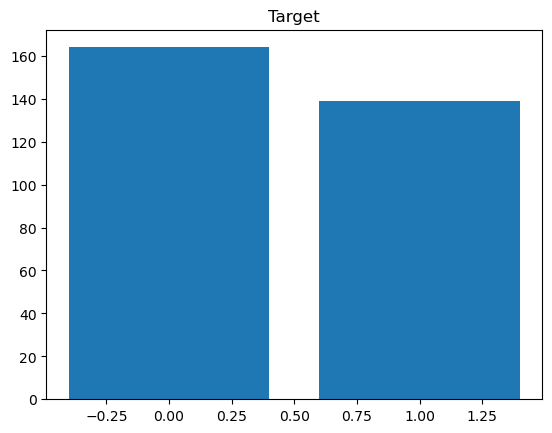

In [16]:
plt.bar(y.value_counts().index, y.value_counts().values)
plt.title("Target")

Text(0, 0.5, '')

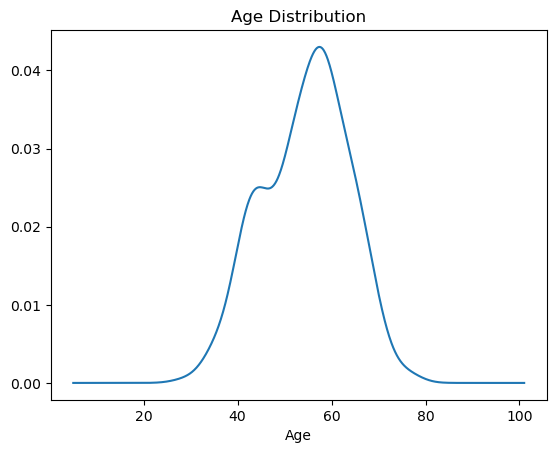

In [17]:
X["Age"].plot.kde()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("")

Text(0, 0.5, '')

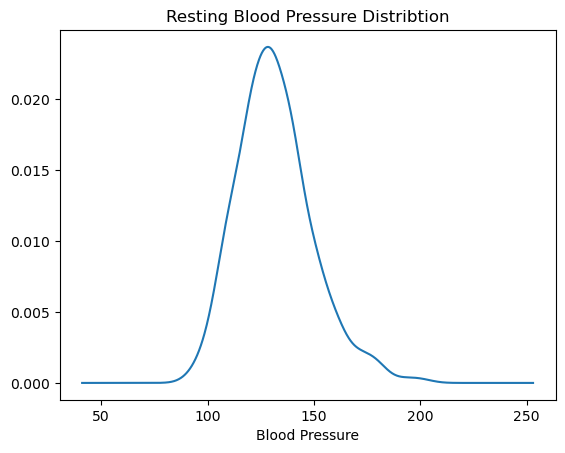

In [18]:
X["trestbps(resting blood pressure)"].plot.kde()
plt.title("Resting Blood Pressure Distribtion")
plt.xlabel("Blood Pressure")
plt.ylabel("")

Text(0, 0.5, '')

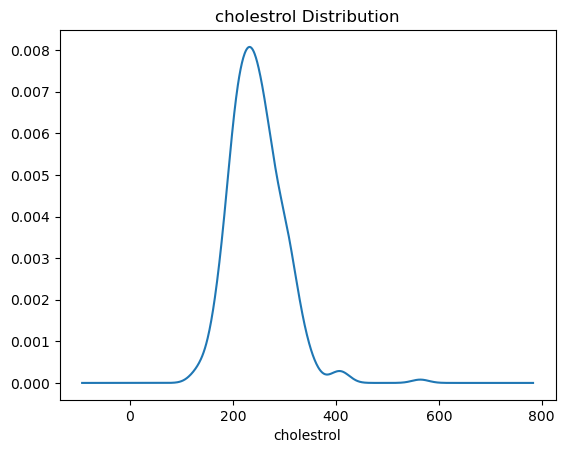

In [19]:
X["chol"].plot.kde()
plt.title("cholestrol Distribution")
plt.xlabel("cholestrol")
plt.ylabel("")

Text(0, 0.5, '')

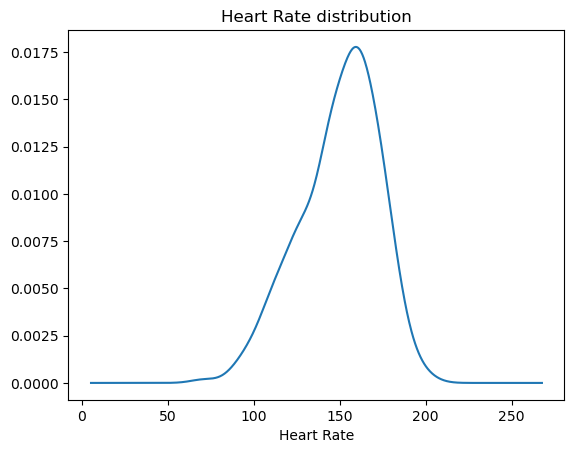

In [20]:
X["thalach"].plot.kde()
plt.title("Heart Rate distribution")
plt.xlabel("Heart Rate")
plt.ylabel("")

([<matplotlib.axis.XTick at 0x7fa60907a430>,
 [Text(0, 0, ''), Text(0, 0, '')])

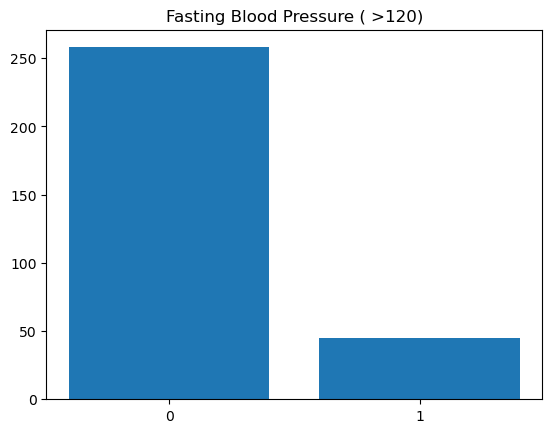

In [21]:
plt.bar(X['fbs'].value_counts().index, X['fbs'].value_counts().values)
plt.title("Fasting Blood Pressure ( >120)")
plt.xticks([0,1])

([<matplotlib.axis.XTick at 0x7fa6046f4a00>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

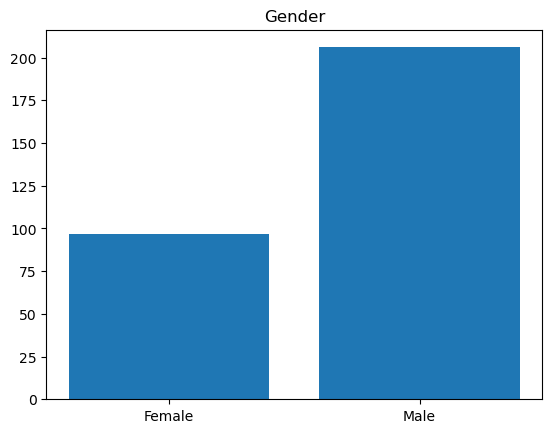

In [22]:
plt.bar(X['Sex'].value_counts().index, X['Sex'].value_counts().values)
plt.title("Gender")
plt.xticks([0,1], ["Female", "Male"])

# Classification without any hyper parameters


In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 7), (61, 7), (242,), (61,))

## With Entropy

In [99]:
dt_clf = tree.DecisionTreeClassifier(criterion='entropy')

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.46875, 0.9705882352941176, 'Chest-pain-type <= 3.5\nentropy = 0.999\nsamples = 242\nvalue = [126, 116]'),
 Text(0.1725, 0.9117647058823529, 'Age <= 55.5\nentropy = 0.767\nsamples = 125\nvalue = [97, 28]'),
 Text(0.04, 0.8529411764705882, 'chol <= 228.0\nentropy = 0.422\nsamples = 70\nvalue = [64, 6]'),
 Text(0.02, 0.7941176470588235, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.06, 0.7941176470588235, 'chol <= 231.5\nentropy = 0.619\nsamples = 39\nvalue = [33, 6]'),
 Text(0.04, 0.7352941176470589, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.08, 0.7352941176470589, 'thalach <= 152.5\nentropy = 0.414\nsamples = 36\nvalue = [33, 3]'),
 Text(0.04, 0.6764705882352942, 'trestbps(resting blood pressure) <= 115.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.02, 0.6176470588235294, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06, 0.6176470588235294, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.12, 0.6764705882352942, 'chol <= 233.5\ne

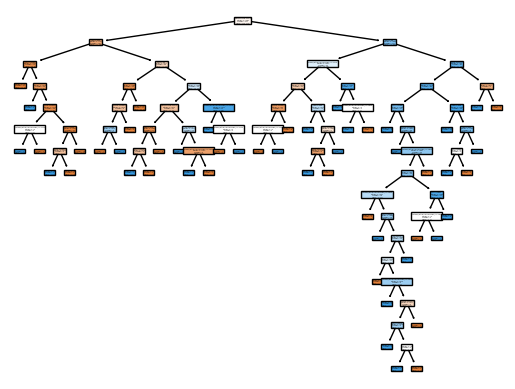

In [100]:
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns)

### Classification Report For Train and Test Set

In [101]:
print("Train Set")
print(classification_report(y_train, dt_clf.predict(x_train)))
print("Test Set")
print(classification_report(y_test, dt_clf.predict(x_test)))

Train Set
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       126
        True       1.00      1.00      1.00       116

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

Test Set
              precision    recall  f1-score   support

       False       0.76      0.68      0.72        38
        True       0.56      0.65      0.60        23

    accuracy                           0.67        61
   macro avg       0.66      0.67      0.66        61
weighted avg       0.69      0.67      0.68        61



# Classification With Hyper parameters

## Without Normalization

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 7), (61, 7), (242,), (61,))

### With Entropy

#### max-depth=2

In [136]:
dt_clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=4)

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.45689655172413796, 0.9, 'BloodPressure <= 3.5\ngini = 0.499\nsamples = 242\nvalue = [126, 116]'),
 Text(0.1896551724137931, 0.7, 'Pregnancies <= 55.5\ngini = 0.348\nsamples = 125\nvalue = [97, 28]'),
 Text(0.06896551724137931, 0.5, 'Insulin <= 228.0\ngini = 0.157\nsamples = 70\nvalue = [64, 6]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.10344827586206896, 0.3, 'Insulin <= 231.5\ngini = 0.26\nsamples = 39\nvalue = [33, 6]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.3103448275862069, 0.5, 'Glucose <= 0.5\ngini = 0.48\nsamples = 55\nvalue = [33, 22]'),
 Text(0.2413793103448276, 0.3, 'Pregnancies <= 62.5\ngini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3793

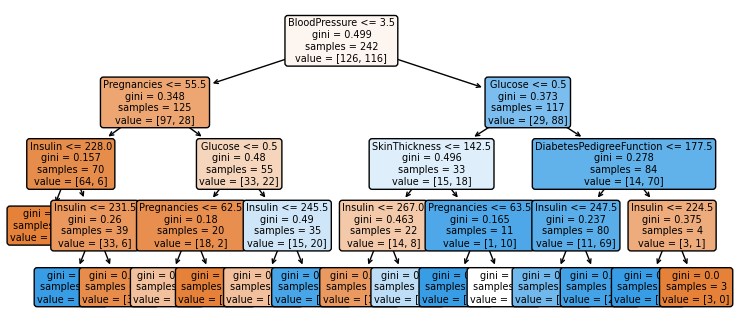

In [160]:
plt.figure(figsize=(9,4))
tree.plot_tree(dt_clf, filled=True, feature_names=X.columns, fontsize=7, rounded=True)

##### Classification Report For Train and Test Set

In [161]:
print("Train Set")
print(classification_report(y_train, dt_clf.predict(x_train)))

print("Test Set")
print(classification_report(y_test, dt_clf.predict(x_test)))

Train Set
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       126
        True       0.86      0.87      0.87       116

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

Test Set
              precision    recall  f1-score   support

       False       0.79      0.82      0.81        38
        True       0.68      0.65      0.67        23

    accuracy                           0.75        61
   macro avg       0.74      0.73      0.74        61
weighted avg       0.75      0.75      0.75        61



In [162]:
parameters = {
    "criterion":["gini", "entropy"],
    "max_depth": range(1,8),
    "min_impurity_decrease": np.arange(0.000, 0.005, 0.0001)   
}
tree.DecisionTreeClassifier(criterion="log_loss")
best_clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=parameters, n_jobs=-1)
best_clf.fit(x_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 8),
                         'min_impurity_decrease': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049])})